1. Clean up the dataset

In [80]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

# clean data for potential na/empty cells
data_df = pd.read_csv('preproc.csv')
data_df.dropna(inplace=True)
data_df.drop_duplicates(inplace=True)

# get rid of first column since it a duplicate of indexes
data_df = data_df[data_df.columns[1:]]
# data_df

2. Find the optimal k. Optimal k for all pairs is k=4

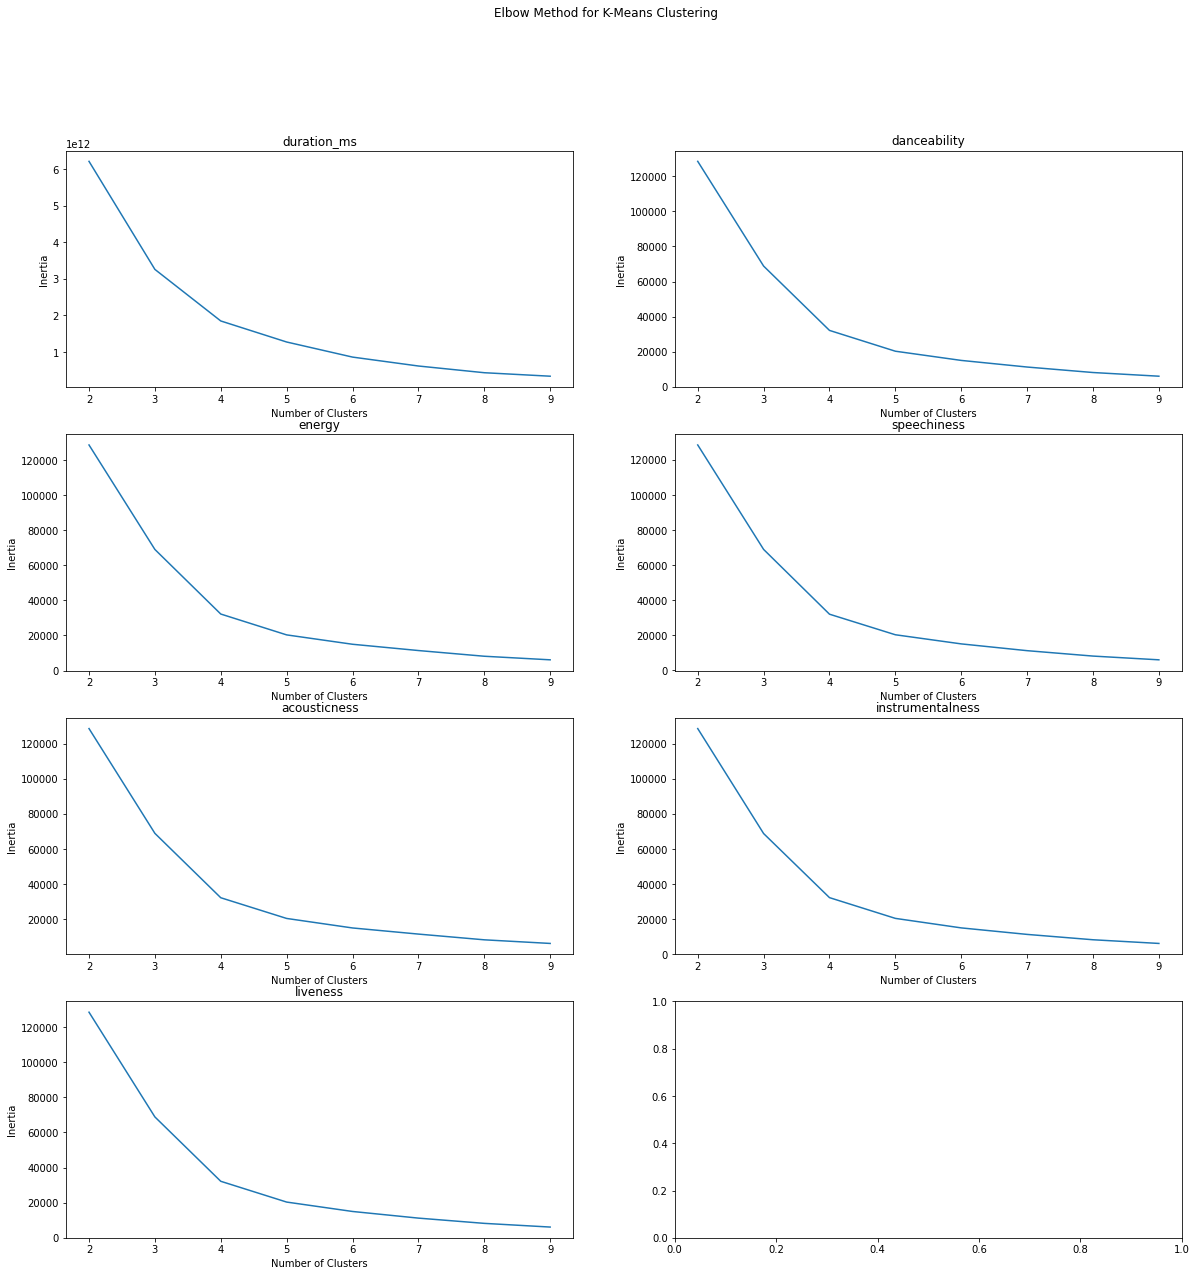

In [89]:
attr = ['duration_ms', 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness']
pair = []
for i in range(len(attr)):
    pair.append(data_df[[attr[i], 'popularity']])

values = []
for i in pair:
    inner = []
    for j in range(2, 10):
        model = KMeans(n_clusters=j, max_iter=500)
        model.fit(i)
        inner.append(model.inertia_)
    values.append(inner)

#  subplot each attribute
fig, axs = plt.subplots(4, 2, figsize=(20, 20))
fig.suptitle('Elbow Method for K-Means Clustering')

for i in range(len(attr)):
    axs[i//2, i%2].plot(range(2, 10), values[i])
    axs[i//2, i%2].set_title(attr[i])
    axs[i//2, i%2].set_xlabel('Number of Clusters')
    axs[i//2, i%2].set_ylabel('Inertia')

plt.show()

3. Create model to cluster data

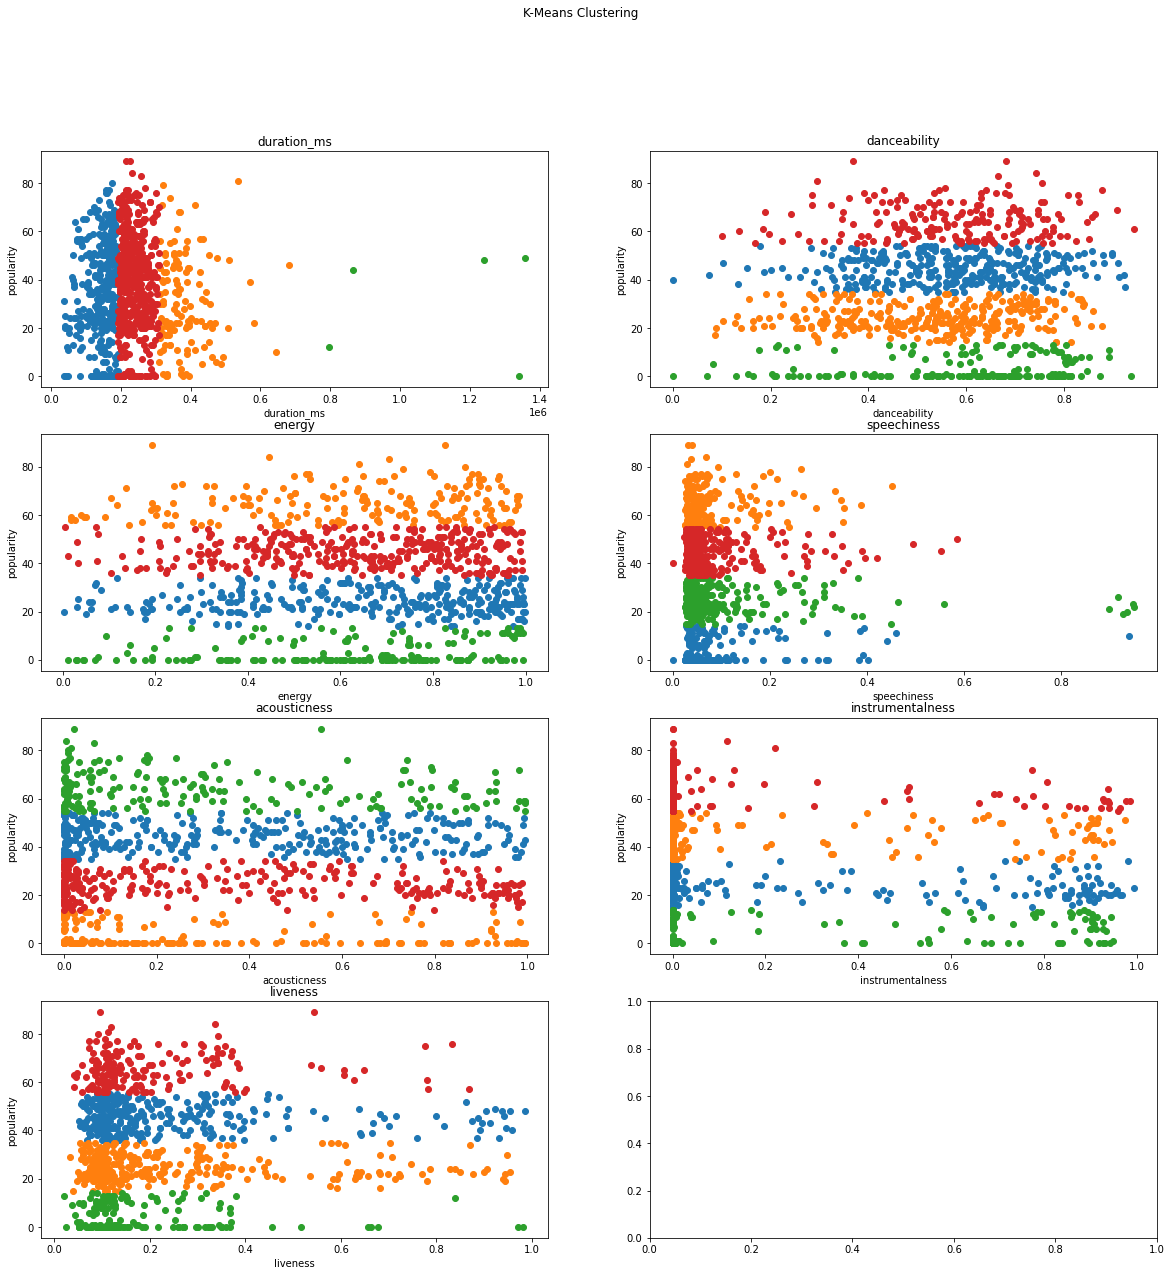

In [90]:
models = {}
yhats = {}
for i in range(len(attr)):
    model = KMeans(n_clusters=4, max_iter=500)
    model.fit(pair[i])
    models[f'model_{attr[i]}'] = model
    yhats[f'yhat_{attr[i]}'] = model.predict(pair[i])

#  subplot each attribute
fig, axs = plt.subplots(4, 2, figsize=(20, 20))
fig.suptitle('K-Means Clustering')

for i in range(len(attr)):
    clusters = unique(yhats[f'yhat_{attr[i]}'])
    for cluster in clusters:
        row_ix = data_df[models[f'model_{attr[i]}'].labels_ == cluster]
        axs[i//2, i%2].scatter(row_ix[attr[i]], row_ix['popularity'])
    axs[i//2, i%2].set_title(attr[i])
    axs[i//2, i%2].set_xlabel(attr[i])
    axs[i//2, i%2].set_ylabel('popularity')

plt.show()